In [1]:
import os

import itertools

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import tensorflow as tf

from scipy.fft import fft, dct
import scipy.stats as stats

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('max_columns', None)

In [4]:
DATA_PATH = '../../Data/TRANSFORMED_DATA/lr_transformed_cea_data.csv'

In [5]:
class fixedFrameConstructor:
    """
    A class to generate frames of data based on fixed window size.

    ...

    Attributes
    ----------
    df : dataframe
       the dataframe that contains all of the data
    frame_size : int
       the size of each sliced window
    skip_size : int
       the size of the window that should skipped before creating a new one
    Methods
    -------
    df_to_fixed_frames
       Creates a tuple of the frames containing the sequence of temporal series and the corresponding 
       labels. Each frame is reduced to a vactor thanks to a PCA algorithm
    df_to_fixed_dct_frames
       Creates a tuple of the frames containing the DCT transform of the sequence of temporal series 
       and the corresponding labels. Each frame is reduced to a vactor thanks to a PCA algorithm
    df_to_fixed_fft_frames
       Creates a tuple of the frames containing the FFT transform of the sequence of temporal series 
       and the corresponding labels. Each frame is reduced to a vactor thanks to a PCA algorithm
    """
    def __init__(self, df):
        """
        Initialize the dataframe

        ...

        Parameters
        ----------
        df : dataframe
           the dataframe that contains all of the data
        """
        self.df = df
        
    def df_to_fixed_frames(self, frame_size, skip_size):
        """Creates a tuple of the frames containing the sequence of temporal series and the corresponding 
        labels. Each frame is reduced to a vactor thanks to a PCA algorithm
        
        Parameters
        ----------
        frame_size : int
           the size of each sliced window
        skip_size : int
           the size of the window that should skipped before creating a new one
       
        Returns
        -------
        frames : array
            An array containing sub-arrays of each reduced frame of data
        labels : array
            An array containing labels corresponding to each sub-frame
        """
        n_components = min(frame_size, 6)
        frames = []
        labels = []
        for i in range(0, len(self.df) - frame_size, skip_size):
            acc_x = self.df['Acc_x'].values[i:i+frame_size]
            acc_y = self.df['Acc_y'].values[i:i+frame_size]
            acc_z = self.df['Acc_z'].values[i:i+frame_size]

            gyro_x = self.df['Gyro_x'].values[i:i+frame_size]
            gyro_y = self.df['Gyro_y'].values[i:i+frame_size]
            gyro_z = self.df['Gyro_z'].values[i:i+frame_size]

            label = stats.mode(self.df['appui_leve'][i:i+frame_size])[0][0]

            temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])
            pca = PCA(n_components=n_components)
            pca.fit(temp_frame)
            temp_frame = pca.transform(temp_frame)
            frames.append(temp_frame)
            labels.append(label)

        frames = np.asarray(frames).reshape(-1, 6 * n_components)
        labels = np.asarray(labels)

        return frames, labels
    
    def df_to_fixed_dct_frames(self, frame_size, skip_size):
        """Creates a tuple of the frames containing the DCT transform of the sequence of temporal series 
        and the corresponding labels. Each frame is reduced to a vactor thanks to a PCA algorithm
        
        Parameters
        ----------
        frame_size : int
           the size of each sliced window
        skip_size : int
           the size of the window that should skipped before creating a new one
       
        Returns
        -------
        frames : array
            An array containing sub-arrays of each reduced frame of data
        labels : array
            An array containing labels corresponding to each sub-frame
        """
        n_components = min(frame_size, 6)
        frames = []
        labels = []
        for i in range(0, len(self.df) - frame_size, skip_size):
            acc_x = dct(self.df['Acc_x'].values[i:i+frame_size])
            acc_y = dct(self.df['Acc_y'].values[i:i+frame_size])
            acc_z = dct(self.df['Acc_z'].values[i:i+frame_size])

            gyro_x = dct(self.df['Gyro_x'].values[i:i+frame_size])
            gyro_y = dct(self.df['Gyro_y'].values[i:i+frame_size])
            gyro_z = dct(self.df['Gyro_z'].values[i:i+frame_size])

            label = stats.mode(self.df['appui_leve'][i:i+frame_size])[0][0]

            temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])
            pca = PCA(n_components=n_components)
            pca.fit(temp_frame)
            temp_frame = pca.transform(temp_frame)
            frames.append(temp_frame)
            labels.append(label)

        frames = np.asarray(frames).reshape(-1, 6 * n_components)
        labels = np.asarray(labels)

        return frames, labels
    
    def df_to_fixed_fft_frames(self, frame_size, skip_size):
        """Creates a tuple of the frames containing the FFT transform of the sequence of temporal series 
        and the corresponding labels. Each frame is reduced to a vactor thanks to a PCA algorithm
        
        Parameters
        ----------
        frame_size : int
           the size of each sliced window
        skip_size : int
           the size of the window that should skipped before creating a new one
       
        Returns
        -------
        frames : array
            An array containing sub-arrays of each reduced frame of data
        labels : array
            An array containing labels corresponding to each sub-frame
        """
        n_components = min(frame_size, 6)
        frames = []
        labels = []
        for i in range(0, len(self.df) - frame_size, skip_size):
            acc_x = fft(self.df['Acc_x'].values[i:i+frame_size]).real
            acc_y = fft(self.df['Acc_y'].values[i:i+frame_size]).real
            acc_z = fft(self.df['Acc_z'].values[i:i+frame_size]).real

            gyro_x = fft(self.df['Gyro_x'].values[i:i+frame_size]).real
            gyro_y = fft(self.df['Gyro_y'].values[i:i+frame_size]).real
            gyro_z = fft(self.df['Gyro_z'].values[i:i+frame_size]).real

            label = stats.mode(self.df['appui_leve'][i:i+frame_size])[0][0]

            temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])
            pca = PCA(n_components=n_components)
            pca.fit(temp_frame)
            temp_frame = pca.transform(temp_frame)
            frames.append(temp_frame)
            labels.append(label)

        frames = np.asarray(frames).reshape(-1, 6 * n_components)
        labels = np.asarray(labels)

        return frames, labels

In [6]:
class FormatData:
    """
    A class to generate a dictionnary containing training and test data as well as frames and 
    dataframes that are sessential to recreate the original signal.

    ...

    Attributes
    ----------
    data_path : str
       the path to the csv file
    id_out : str
       the ID of the patient to use for test data
    train_df : dataframe
       the data frame created from the list patient IDs used fot the training set
    test_df : dataframe
       the data frame created from the patient ID used fot the test set
    train_var_frames : list
       the list of frames created from the training data
    test_var_frames : list
       the list of frames created from the test data
    transform : str
       the name of transform to use for data (None, dct or fft)
    window_size : int
       the size of each sliced window
    skip_size : int
       the size of the window that should skipped before creating a new one
    window_type : str
       the type of window to use, fixed or vary
    
    Methods
    -------
    loso_split
       Splits data into training and test data by Leaving One Subject One
    variate_window_df
       Creates a list of frames based on the target variable, each time
       the value of the target is swithing a new frame is created
    create_variate_frames
       Creates data matrices as well as the targets for both training and testing
    create_fixed_frames
       Creates data matrices as well as the targets for both training and testing
    """
    def __init__(self, data_path):
        """
        Initialize path to the data file, reads the file and initializes the data matrices

        ...

        Parameters
        ----------
        data_path : str
            The path leading to the data file
        """
        self.data_path = data_path
        self.data = pd.read_csv(self.data_path)
        
        self.X_train = []
        self.X_test = []
        self.y_train = []
        self.y_test = []
        
    def loso_split(self, id_out='P42'):
        """Splits data into training and test data by Leaving One Subject One

        Parameters
        ----------
        id_out : str
            the ID of the patient to use for test data

        Returns
        -------
        train_df : dataframe
           the data frame created from the list patient IDs used fot the training set
        test_df : dataframe
           the data frame created from the patient ID used fot the test set
        """
        train_df = self.data[self.data.id_pat != id_out]
        test_df = self.data[self.data.id_pat == id_out]
        return train_df, test_df
    
    def create_fixed_frames(self, train_df, test_df, window_size, skip_size, transform=None):
        """Creates a list of frames based on the chosen window, it 
        corresponds to the most frequent label in each window

        Parameters
        ----------
        train_df : dataframe
           the data frame created from the list patient IDs used fot the training set
        test_df : dataframe
           the data frame created from the patient ID used fot the test set
        window_size : int
           the size of each sliced window
        skip_size : int
           the size of the window that should skipped before creating a new one
        transform : str
           the name of transform to use for data (None, dct or fft)

        Returns
        -------
        X_train : array
           an array that contains the training data
        X_test : array
           an array that contains the test data
        y_train : array
           an array that contains labels for the training data
        y_test : array
           an array that contains labels for the test data
        """
        if transform is None:
            frame_constructor = fixedFrameConstructor(train_df)
            X_train, y_train = frame_constructor.df_to_fixed_frames(window_size, skip_size)
            frame_constructor = fixedFrameConstructor(test_df)
            X_test, y_test = frame_constructor.df_to_fixed_frames(window_size, skip_size)
        elif transform == 'dct':
            frame_constructor = fixedFrameConstructor(train_df)
            X_train, y_train = frame_constructor.df_to_fixed_dct_frames(window_size, skip_size)
            frame_constructor = fixedFrameConstructor(test_df)
            X_test, y_test = frame_constructor.df_to_fixed_dct_frames(window_size, skip_size)
        elif transform == 'fft':
            frame_constructor = fixedFrameConstructor(train_df)
            X_train, y_train = frame_constructor.df_to_fixed_fft_frames(window_size, skip_size)
            frame_constructor = fixedFrameConstructor(test_df)
            X_test, y_test = frame_constructor.df_to_fixed_fft_frames(window_size, skip_size)
            
        return X_train, X_test, y_train, y_test
    
    def __call__(self, window_type, window_size=None, skip_size=None):
        """Applies transforms after class instance being called

        Parameters
        ----------
        window_type : str
           the type of window to use, fixed or vary
        window_size : int
           the size of each sliced window
        skip_size : int
           the size of the window that should skipped before creating a new one
    

        Returns
        -------
        my_frames : dict
           the dictionary that contains all of the combinaitions of generated data
        """
        list_transforms = [None, 'dct', 'fft']
        train_df, test_df = self.loso_split()
        my_frames = {}
        if window_type == 'fixed':
            assert (window_size is not None) or (skip_size is not None), "Arguments window_size and skip_size are missing"
            my_frames = {transform:self.create_fixed_frames(train_df, test_df, window_size, skip_size, transform) for transform in list_transforms}
            my_frames['df_test'] = test_df
        return my_frames

In [8]:
class MLModels:
    """
    A class to create, train and evaluate ML models (random forest and xgboost)

    ...

    Attributes
    ----------
    frames_dict : dict
       the dictionary that contains all of the combinaitions of generated data
    window_type : str
       the type of window to use, fixed or vary        
    transform_type : str
       the name of transform to use for data (None, dct or fft)
       
    Methods
    -------
    fit_models
       Fits the models on the training data
    evaluate_models
       Evaualtes the predictions made by the models by reformatting them into their initial length
    """
    def __init__(self, frames_dict, window_type, transform_type, window_size, skip_size):
        """
        Initialize dictionary of the different types of frames, the type of 
        windows and the data transformation type as well as the classifiers
        to train

        ...

        Parameters
        ----------
        frames_dict : dict
           the dictionary that contains all of the combinaitions of generated data
        window_type : str
           the type of window to use, fixed or vary        
        transform_type : str
           the name of transform to use for data (None, dct or fft)
        """
        self.frames_dict = frames_dict
        self.window_type = window_type
        self.transform_type = transform_type
        self.X_train, self.X_test, self.y_train, self.y_test = self.frames_dict[self.transform_type]
        self.test_df = {}
        self.test_var_frames = {}
        self.test_df = self.frames_dict['df_test']
            
        self.window_size = window_size
        self.skip_size = skip_size

        self.RFClassifier = RandomForestClassifier(random_state=0)
        self.XGBClassifier = XGBClassifier(random_state=0, silent=True)
    
    def fit_models(self):
        """Fits the models on the training data
        """
        self.RFClassifier.fit(self.X_train, self.y_train)
        self.XGBClassifier.fit(self.X_train, self.y_train)
        
    def evaluate_models(self):
        """Evaualtes the predictions made by the models by reformatting them into their initial length
        """
        rf_score = self.RFClassifier.score(self.X_test, self.y_test)
        y_pred_rf = self.RFClassifier.predict(self.X_test)
        y_real_test_pred = [[ele]*window_size for ele in y_pred_rf]
        y_real_test_pred_df = pd.DataFrame({i:[None]*self.test_df.shape[0] for i in range(len(y_real_test_pred))})
        for idx, pred_frame in enumerate(y_real_test_pred):
            y_real_test_pred_df.loc[idx*self.skip_size:idx*self.skip_size+len(pred_frame)-1, idx] = pred_frame

        y_real_test_pred_df['prediction'] = y_real_test_pred_df.mode(axis=1).iloc[:, 0]
        y_real_test_pred = y_real_test_pred_df['prediction'].dropna().values
        y_real_test = self.test_df.appui_leve.values[:len(y_real_test_pred)]
        print(y_real_test_pred.shape, y_real_test.shape)
        rf_real_score = accuracy_score(y_real_test_pred, y_real_test)
        print(
        """
        ##################################
        #            RF model            #
        ##################################
        """
        )
        print('Windowed test data score: ', rf_score)
        print('Real test data score: ', rf_real_score)
        
        plt.figure(figsize=(20,5))
        plt.plot(y_real_test)
        plt.plot(y_real_test_pred)
        plt.figure(figsize=(20,5))
        plt.plot(y_real_test)
        plt.figure(figsize=(20,5))
        plt.plot(y_real_test_pred)
        plt.show()
        
        xgb_score = self.XGBClassifier.score(self.X_test, self.y_test)
        y_pred_xgb = self.XGBClassifier.predict(self.X_test)
        y_real_test_pred = [[ele]*window_size for ele in y_pred_xgb]
        y_real_test_pred_df = pd.DataFrame({i:[None]*self.test_df.shape[0] for i in range(len(y_real_test_pred))})
        for idx, pred_frame in enumerate(y_real_test_pred):
            y_real_test_pred_df.loc[idx*self.skip_size:idx*self.skip_size+len(pred_frame)-1, idx] = pred_frame

        y_real_test_pred_df['prediction'] = y_real_test_pred_df.mode(axis=1).iloc[:, 0]
        y_real_test_pred = y_real_test_pred_df['prediction'].dropna().values
        y_real_test = self.test_df.appui_leve.values[:len(y_real_test_pred)]
        
        xgb_real_score = accuracy_score(y_real_test_pred, y_real_test)
        print(
        """
        #################################
        #           XGB model           #
        #################################
        """
        )
        print('Windowed test data score: ', xgb_score)
        print('Real test data score: ', xgb_real_score)
        
        plt.figure(figsize=(20,5))
        plt.plot(y_real_test)
        plt.plot(y_real_test_pred)
        plt.figure(figsize=(20,5))
        plt.plot(y_real_test)
        plt.figure(figsize=(20,5))
        plt.plot(y_real_test_pred)
        plt.show()
        
    def __call__(self):
        self.fit_models()
        self.evaluate_models()

In [ ]:
window_type = 'Fixed'
model_trainer = MLModels(formatted_frames, window_type, transform_type, window_size, skip_size)
model_trainer()

[18:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


######################################################################
WINDOW TYPE: fixed - TRANSFORM TYPE: None
WINDOW SIZE: 20 - SKIP SIZE: 10
######################################################################
[22:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(55660,) (55660,)

        ##################################
        #            RF mode

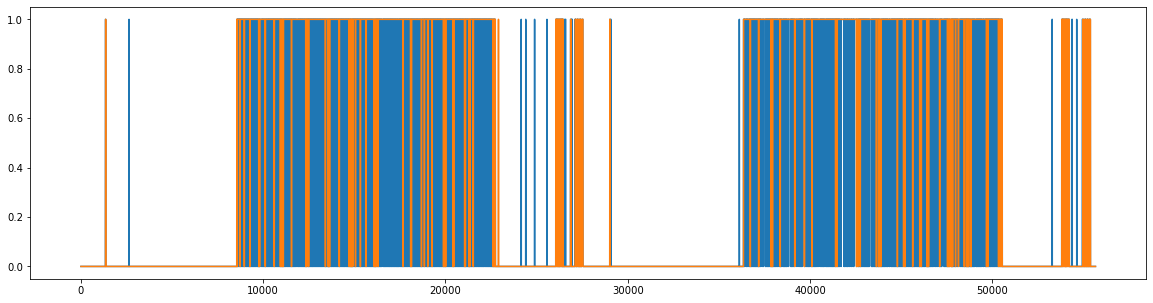

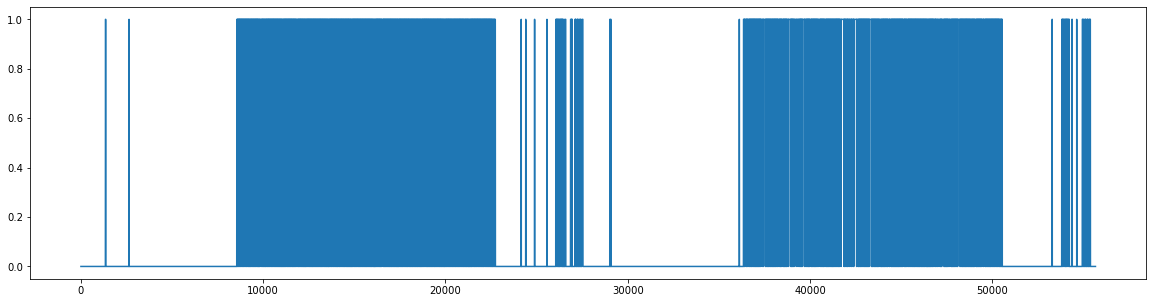

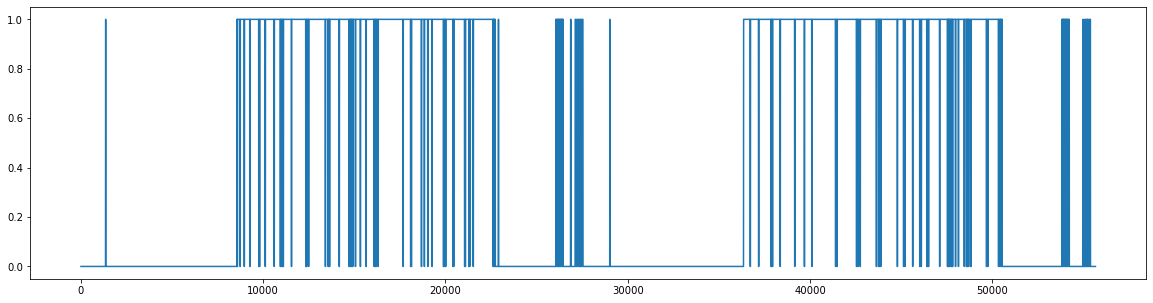


        #################################
        #           XGB model           #
        #################################
        
Windowed test data score:  0.9511230907457322
Real test data score:  0.8727272727272727


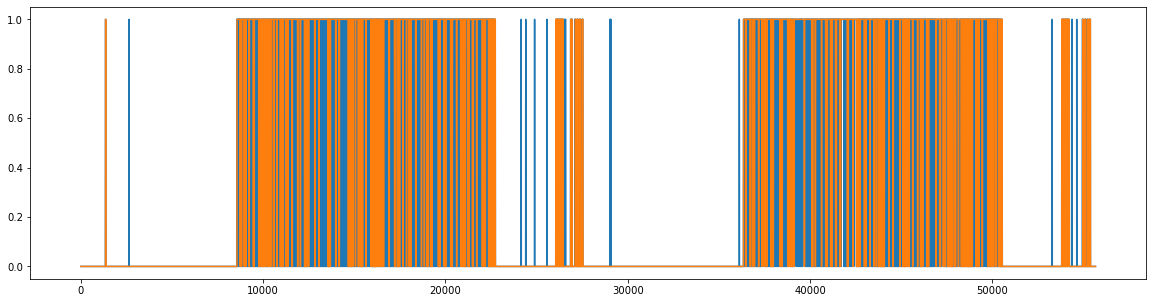

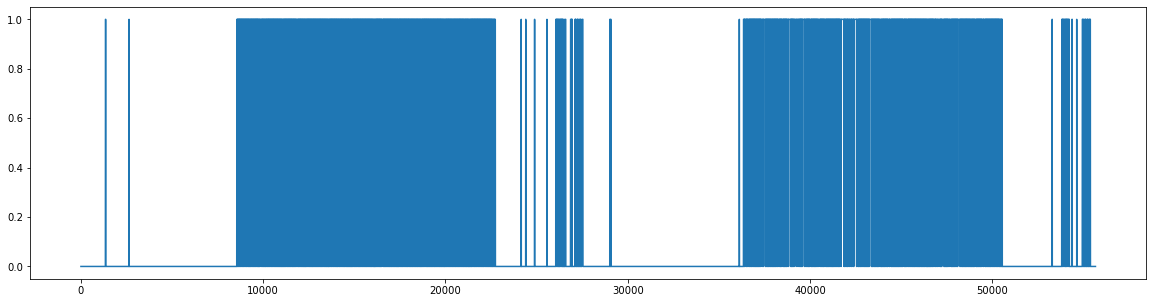

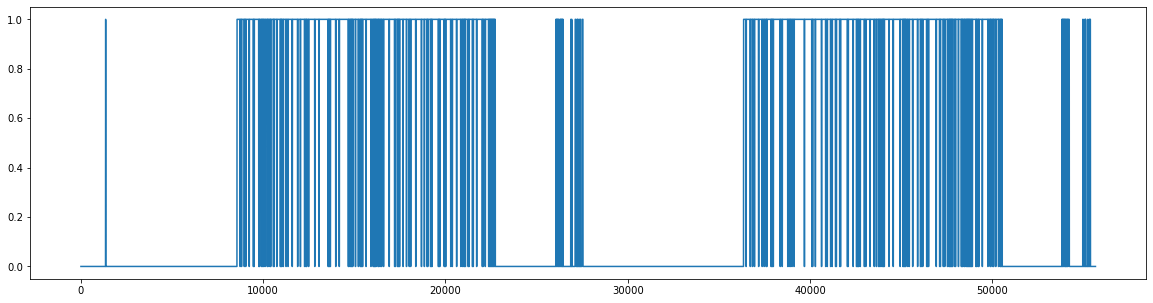

######################################################################
WINDOW TYPE: fixed - TRANSFORM TYPE: dct
WINDOW SIZE: 20 - SKIP SIZE: 10
######################################################################
[22:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
window_size, skip_size = 20, 10
window_type = 'fixed'
formatted_frames = None
data_formattor = FormatData(DATA_PATH)
formatted_frames = data_formattor(window_type='fixed', window_size=window_size, skip_size=skip_size)
for transform_type in [None, 'dct', 'fft']:
    print('#'*70)
    print('WINDOW TYPE: {} - TRANSFORM TYPE: {}'.format(window_type, transform_type))
    print('WINDOW SIZE: {} - SKIP SIZE: {}'.format(window_size, skip_size))
    print('#'*70)
    model_trainer = MLModels(formatted_frames, window_type, transform_type, window_size, skip_size)
    model_trainer()

**Due to the large amount of generated data, the RAM is excessively used leading the machine to crash!!**